# Continuous Control

---

### 1. Environment setup

Run the second version of the environment (with 20 agents)

In [1]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Register important stuff

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
n_agents = len(env_info.agents)
state_dim = env_info.vector_observations.shape[1]
action_dim = brain.vector_action_space_size
print(f"n_agents: {n_agents}, state_dim: {state_dim}, action_dim: {action_dim}")

n_agents: 20, state_dim: 33, action_dim: 4


In [3]:
states = env_info.vector_observations
actions = np.random.randn(n_agents, action_dim)
env_info = env.step(actions)[brain_name]
rewards = env_info.rewards
dones = env_info.local_done
for val, name in zip([states, actions, rewards, dones], ['states', 'actions', 'rewards', 'dones']):
    print(f"type({name}): {type(val)}")
    if isinstance(val, np.ndarray):
        print(f"{name}.shape: {val.shape}, {name}.dtype: {val.dtype}")

type(states): <class 'numpy.ndarray'>
states.shape: (20, 33), states.dtype: float64
type(actions): <class 'numpy.ndarray'>
actions.shape: (20, 4), actions.dtype: float64
type(rewards): <class 'list'>
type(dones): <class 'list'>


### 3. Train the agent

In [4]:
from collections import deque
from control.agent import Agent
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Some helper functions
def solved(episode, scores, goal=30):
    return len(scores) == 100 and np.mean(scores) >= goal

def status(episode, scores, losses):
    print(
        "\rEpisode {}\t Mean Scores: {:.2f} \t Mean Losses: {:.2f}".format(
            episode, np.mean(scores), np.mean(losses), end=""
        )
    )
    if i_episode % 100 == 0:
        clear_output(True)
        plot(episode, scores, losses)

def plot(episode, scores, losses):
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title(f"Episode: {episode}, Last 100 scores")
    plt.plot(scores)
    plt.subplot(132)
    plt.title('Last 100 losses')
    plt.plot(losses)
    plt.show()
    
def plot_final(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

v_next_mean: -0.24474331736564636, v_mean: 4.209702014923096
advantages_mean: -4.44838809967041
returns_mean: -0.23868565261363983
v_next_mean: -0.2805722653865814, v_mean: 4.209702014923096
advantages_mean: -4.483329772949219
returns_mean: -0.27362775802612305
v_next_mean: -0.258445680141449, v_mean: 4.209702014923096
advantages_mean: -4.461751937866211
returns_mean: -0.2520488202571869
v_next_mean: -0.24524655938148499, v_mean: 4.209702014923096
advantages_mean: -4.448879241943359
returns_mean: -0.23917639255523682
v_next_mean: -0.16121040284633636, v_mean: 4.209702014923096
advantages_mean: -4.366922855377197
returns_mean: -0.157220259308815
v_next_mean: -0.07074916362762451, v_mean: 4.209702014923096
advantages_mean: -4.278700828552246
returns_mean: -0.06899803131818771
v_next_mean: -0.07008589804172516, v_mean: 4.209702014923096
advantages_mean: -4.2780537605285645
returns_mean: -0.06835119426250458
v_next_mean: -0.014297403395175934, v_mean: 4.209702014923096
advantages_mean: -4.

v_next_mean: -0.01689685881137848, v_mean: 4.209702014923096
advantages_mean: -4.226181983947754
returns_mean: -0.016478639096021652
v_next_mean: -0.06541897356510162, v_mean: 4.209702014923096
advantages_mean: -4.273502349853516
returns_mean: -0.06379977613687515
v_next_mean: -0.01704593189060688, v_mean: 4.209702014923096
advantages_mean: -4.226326942443848
returns_mean: -0.016624022275209427
v_next_mean: -0.050871849060058594, v_mean: 4.209702014923096
advantages_mean: -4.259315490722656
returns_mean: -0.04961271211504936
v_next_mean: -0.06916660070419312, v_mean: 4.209702014923096
advantages_mean: -4.277157783508301
returns_mean: -0.06745464354753494
v_next_mean: -0.05318111181259155, v_mean: 4.209702014923096
advantages_mean: -4.261567115783691
returns_mean: -0.05186481028795242
v_next_mean: -0.024816732853651047, v_mean: 4.209702014923096
advantages_mean: -4.233904838562012
returns_mean: -0.024202490225434303
v_next_mean: 0.002352211158722639, v_mean: 4.209702014923096
advantages

v_next_mean: 0.01631312444806099, v_mean: 4.209702014923096
advantages_mean: -4.193793296813965
returns_mean: 0.015909355133771896
v_next_mean: 0.027799252420663834, v_mean: 4.209702014923096
advantages_mean: -4.182591438293457
returns_mean: 0.02711118385195732
v_next_mean: 0.01348588615655899, v_mean: 4.209702014923096
advantages_mean: -4.1965508460998535
returns_mean: 0.013152090832591057
v_next_mean: 0.08762183040380478, v_mean: 4.209702014923096
advantages_mean: -4.124249458312988
returns_mean: 0.0854530781507492
v_next_mean: 0.031221186742186546, v_mean: 4.209702014923096
advantages_mean: -4.179254055023193
returns_mean: 0.0304484311491251
v_next_mean: 0.00812240969389677, v_mean: 4.209702014923096
advantages_mean: -4.201781272888184
returns_mean: 0.0079213697463274
v_next_mean: 0.0424845889210701, v_mean: 4.209702014923096
advantages_mean: -4.168269157409668
returns_mean: 0.04143304377794266
v_next_mean: -0.03516746684908867, v_mean: 4.209702014923096
advantages_mean: -4.24399948

v_next_mean: 0.05006657913327217, v_mean: 4.209702014923096
advantages_mean: -4.16087532043457
returns_mean: 0.048827365040779114
v_next_mean: 0.012275582179427147, v_mean: 4.209702014923096
advantages_mean: -4.197730541229248
returns_mean: 0.011971743777394295
v_next_mean: 0.03517960011959076, v_mean: 4.209702014923096
advantages_mean: -4.175394058227539
returns_mean: 0.03430885821580887
v_next_mean: 0.06874173879623413, v_mean: 4.209702014923096
advantages_mean: -4.142662048339844
returns_mean: 0.06704028695821762
v_next_mean: 0.13279852271080017, v_mean: 4.209702014923096
advantages_mean: -4.080191135406494
returns_mean: 0.12951160967350006
v_next_mean: -0.00020353271975181997, v_mean: 4.209702014923096
advantages_mean: -4.209900856018066
returns_mean: -0.00019849464297294617
v_next_mean: -0.04074819013476372, v_mean: 4.209702014923096
advantages_mean: -4.249442100524902
returns_mean: -0.039739616215229034
v_next_mean: -0.02138681337237358, v_mean: 4.209702014923096
advantages_mean:

v_next_mean: -0.0005345448735170066, v_mean: 4.209702014923096
advantages_mean: -4.210224151611328
returns_mean: -0.0005213200929574668
v_next_mean: 0.04759985953569412, v_mean: 4.209702014923096
advantages_mean: -4.163280963897705
returns_mean: 0.046421706676483154
v_next_mean: 0.033439040184020996, v_mean: 4.209702014923096
advantages_mean: -4.012118816375732
returns_mean: 0.19758370518684387
v_next_mean: 0.07312772423028946, v_mean: 4.209702014923096
advantages_mean: -4.138384819030762
returns_mean: 0.07131776213645935
v_next_mean: 0.06711128354072571, v_mean: 4.209702014923096
advantages_mean: -4.30844259262085
returns_mean: -0.09873946011066437
v_next_mean: 0.041367996484041214, v_mean: 4.209702014923096
advantages_mean: -4.169358253479004
returns_mean: 0.04034409299492836
v_next_mean: -0.03200729563832283, v_mean: 4.209702014923096
advantages_mean: -4.240917682647705
returns_mean: -0.031215067952871323
v_next_mean: -0.032951097935438156, v_mean: 4.209702014923096
advantages_mean:

v_next_mean: -0.08180780708789825, v_mean: 4.209702014923096
advantages_mean: -4.289485454559326
returns_mean: -0.07978296279907227
v_next_mean: -0.0981544554233551, v_mean: 4.209702014923096
advantages_mean: -4.305427551269531
returns_mean: -0.09572500735521317
v_next_mean: -0.10758157819509506, v_mean: 4.209702014923096
advantages_mean: -4.314621925354004
returns_mean: -0.10491880029439926
v_next_mean: -0.09488256275653839, v_mean: 4.209702014923096
advantages_mean: -4.302236557006836
returns_mean: -0.09253409504890442
v_next_mean: -0.064706951379776, v_mean: 4.209702014923096
advantages_mean: -4.272808074951172
returns_mean: -0.06310537457466125
v_next_mean: -0.09586198627948761, v_mean: 4.209702014923096
advantages_mean: -4.303191661834717
returns_mean: -0.09348928928375244
v_next_mean: -0.05014825612306595, v_mean: 4.209702014923096
advantages_mean: -4.258609771728516
returns_mean: -0.04890703037381172
v_next_mean: -0.02644079364836216, v_mean: 4.209702014923096
advantages_mean: -

v_next_mean: -0.12417695671319962, v_mean: 4.209702014923096
advantages_mean: -4.330805778503418
returns_mean: -0.12110342085361481
v_next_mean: -0.1575922667980194, v_mean: 4.209702014923096
advantages_mean: -4.363394260406494
returns_mean: -0.15369166433811188
v_next_mean: -0.1503792256116867, v_mean: 4.209702014923096
advantages_mean: -4.356359958648682
returns_mean: -0.14665715396404266
v_next_mean: -0.06193389743566513, v_mean: 4.209702014923096
advantages_mean: -4.270103454589844
returns_mean: -0.06040095537900925
v_next_mean: 0.003058977425098419, v_mean: 4.209702014923096
advantages_mean: -4.206719398498535
returns_mean: 0.002983266022056341
v_next_mean: 0.024718454107642174, v_mean: 4.209702014923096
advantages_mean: -4.185595989227295
returns_mean: 0.024106647819280624
v_next_mean: 0.03693728893995285, v_mean: 4.209702014923096
advantages_mean: -4.173679351806641
returns_mean: 0.03602304682135582
v_next_mean: 0.04116629436612129, v_mean: 4.209702014923096
advantages_mean: -4.

v_next_mean: -0.04570106416940689, v_mean: 4.209702014923096
advantages_mean: -4.091902256011963
returns_mean: 0.11780042946338654
v_next_mean: -0.11088438332080841, v_mean: 4.209702014923096
advantages_mean: -4.317842960357666
returns_mean: -0.10813987255096436
v_next_mean: -0.017718499526381493, v_mean: 4.209702014923096
advantages_mean: -4.339201927185059
returns_mean: -0.12949952483177185
v_next_mean: 0.022059986367821693, v_mean: 4.209702014923096
advantages_mean: -4.1881890296936035
returns_mean: 0.021513964980840683
v_next_mean: -0.006589767523109913, v_mean: 4.209702014923096
advantages_mean: -4.216129302978516
returns_mean: -0.006426659412682056
v_next_mean: 0.0166048314422369, v_mean: 4.209702014923096
advantages_mean: -4.030173301696777
returns_mean: 0.17952950298786163
v_next_mean: 0.005656191613525152, v_mean: 4.209702014923096
advantages_mean: -4.20418643951416
returns_mean: 0.0055162073113024235
v_next_mean: 0.009778974577784538, v_mean: 4.209702014923096
advantages_mean

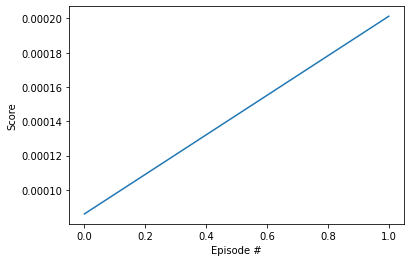

In [6]:
env_info = env.reset(train_mode=True)[brain_name]
scores = deque(maxlen=100)
losses = deque(maxlen=100)
all_scores = []
n_episodes = 2

agent = Agent(state_dim, action_dim, n_agents)

for i_episode in range(1, n_episodes+1):
    dones = np.repeat(False, n_agents)
    agent_scores = []
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    
    while not any(dones):
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        loss = agent.step(next_states, rewards, dones)
        if loss:
            losses.append(loss)
        agent_scores.append(rewards)
        states = next_states
    
    score = np.sum(scores, axis=1).mean()
    scores.append(score)
    all_scores.append(score)
    status(i_episode, scores, losses)
    
    if solved(i_episode, scores):
        print(f"Solved Control problem at episode: {i_episode}, with average score: {np.mean(scores):.2f}")
        print("Saving model parameters to 'checkpoint.pth'")
        agent.model.checkpoint()
        break

plot_final(all_scores)

In [7]:
# env.close()